<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Neural Networks

## *Data Science Unit 4 Sprint 2 Assignment 1*

## Define the Following:
You can add image, diagrams, whatever you need to ensure that you understand the concepts below.

### - Input Layer:
Nodes (visible) which consist of received data from a dataset (or whatever input medium we want to use).
### - Hidden Layer:
Nodes which are 'invisible' to us. They receive input from input node, or another hidden node's output among maybe more exotic cases. They typically help increase the accuracy of the model by allowing the neural network to adapt to more non-linear problems.
### - Output Layer:
Three forms of an output layer: Regression, Binary, Multiclass. All have a special activation function, sometimes called an transfer, to determine if the output should be passed along to affect the outcome or not.
### - Neuron: 
The biological unit that allows and uses electrochemical signals to pass information from one part of a system to another (or in the bio case, brain). Has things called dendrites that connect to axon terminals via axons surrounded by myelin sheathes, inside the cell body next to the dendrites is the nucleus which determines whether or not to pass a signal. Remove all the bio stuff and you got the computer stuff ayo
![Neuron](https://img.tfd.com/medical/Davis/Tabers/n15.jpg)

### Weight:
A weight is a number to modify an input value.
### Activation Function:
An activation function, or transfer function, can update weights using back propogation to create a better outcome. An activation function at its core is typically the same throughout all layers of the NN. It determines how much signal to 'transfer' to the next layer...doesn't seem to be a 1 or 0 type of situation strictly but instead a _long_ number between two values, ala tan, relu, etc.
![RELU](https://upload.wikimedia.org/wikipedia/commons/thumb/f/fe/Activation_rectified_linear.svg/1024px-Activation_rectified_linear.svg.png)
### Node Map:
![Node map!](http://www.asimovinstitute.org/wp-content/uploads/2016/09/ff.png)
A way of drawing a neural network.
### Perceptron:
A type of NN that has the following properties: (n) inputs, 0 hidden layers, 1 output; goes one direction, left-to-right; inputs multiplied by weight, sum all products and pass sum through activation function and outputs as result.

## Inputs -> Outputs

#### Explain the flow of information through a neural network from inputs to outputs. Be sure to include: inputs, weights, bias, and activation functions. How does it all flow from beginning to end?

- _Inputs_: First has weight applied to it via multiplication, then after added to other inputs in the system, has the total summed along with the bias. After that the end result either goes into the apropos hidden layer or straight to our output.
- _Hidden Layers_: receives input from the the node 'above' it, and uses an activation function to determine whether or not to update weights using back propagation or to pass the value along, modified or not.
- _Output_: Three possible forms -> Regression, Binary, Multiclass. They give us values betwixt the apropos forms. One thing to ponder though is that can an output inform the hidden layers and stuff? Like, are output nodes a very distinct thing, or can the definition become muddled with more complex Neural Networks?

## Write your own perceptron code that can correctly classify (99.0% accuracy) a NAND gate. 

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 1 |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 0 |

In [6]:
import pandas as pd
import numpy as np
data = { 'x1': [0,1,0,1],
         'x2': [0,0,1,1],
         'y':  [1,1,1,0]
       }

df = pd.DataFrame.from_dict(data).astype('int')

In [29]:
df

,x1,x2,y
0,0,0,1
1,1,0,1
2,0,1,1
3,1,1,0


In [50]:
corr = [[1],[1],[1],[0]]

In [7]:
##### Your Code Here #####
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_d(x):
    sx = sigmoid(x)
    return sx*(1-sx)

In [39]:
# Since we have correct outputs as y and input data, all we need to do is get random weights
wgt = 2 * np.random.random((3,1)) - 1
wgt

array([[ 0.49996794],
       [ 0.2116424 ],
       [-0.89528902]])

In [40]:
# Inputs
inputs = df.values
inputs

array([[0, 0, 1],
       [1, 0, 1],
       [0, 1, 1],
       [1, 1, 0]])

Calc weighted sum of inputs and weights

In [41]:
wgt_sum = np.dot(inputs, wgt)
wgt_sum

array([[-0.89528902],
       [-0.39532108],
       [-0.68364662],
       [ 0.71161034]])

Output 'activated' value for end of first training epoch

In [42]:
act_out = sigmoid(wgt_sum)
act_out

array([[0.29001957],
       [0.40243702],
       [0.3354479 ],
       [0.67075689]])

Ahhh only last one is above .5 ... uh ohhhh

Take diff of output and true values to calc error

In [51]:
err = corr - act_out
err

array([[ 0.70998043],
       [ 0.59756298],
       [ 0.6645521 ],
       [-0.67075689]])

A little confused on how to interpret this output

Here's gradient descent, or backprop

In [52]:
adj = err * sigmoid_d(act_out)
adj

array([[ 0.17381448],
       [ 0.14350168],
       [ 0.16155062],
       [-0.15015695]])

Update weights based off adjustments

In [53]:
wgt += np.dot(inputs.T, adj)
wgt

array([[ 0.49331267],
       [ 0.22303607],
       [-0.41642225]])

Also a little lost as to interpreting this output.

Here's a function (from teach) to automate a large iteration of the process

In [237]:
for itr in range(300):
    # weighted sum of inputs / weights
    wgt_sum = np.dot(inputs, wgt)
    # activate
    act_out = sigmoid(wgt_sum)
    # calc error
    err = corr - act_out
    # adjust (backprop/grad desc)
    adj = err * sigmoid_d(act_out)
    # update weights based off adjustment
    wgt += np.dot(inputs.T, adj)

In [238]:
print(f'''
Weight after training: \n{wgt}
Output after training: \n{act_out}
''')


Weight after training: 
[[-2.19802321]
 [-2.21645418]
 [ 6.92795653]]
Output after training: 
[[0.99901734]
 [0.99122913]
 [0.99106715]
 [0.01198574]]



Output and weights make sense I think! It's classifying this as a NAND as the fourth output is clearly at 0...I'm guessing that means it's able to determine that this is a NAND? not sure

## Implement your own Perceptron Class and use it to classify a binary dataset: 
- [The Pima Indians Diabetes dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv) 

You may need to search for other's implementations in order to get inspiration for your own. There are *lots* of perceptron implementations on the internet with varying levels of sophistication and complexity. Whatever your approach, make sure you understand **every** line of your implementation and what its purpose is.

In [95]:
diabetes = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [96]:
len(diabetes.columns)

9

Although neural networks can handle non-normalized data, scaling or normalizing your data will improve your neural network's learning speed. Try to apply the sklearn `MinMaxScaler` or `Normalizer` to your diabetes dataset. 

In [190]:
diabetes = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv')

In [229]:
from sklearn.preprocessing import MinMaxScaler, Normalizer

feats = list(diabetes)[:-1]
scaley = MinMaxScaler()
# Fit transform with features
X = scaley.fit_transform(diabetes[feats])
d_norm = pd.DataFrame(X)

In [230]:
# Split it up
X_test = d_norm.iloc[500:]
X_train = d_norm.iloc[0:500]

Normalized!

 Btw EPOCHS are the number of times to run thru the training data while updating our weight

# SEMI-AUTOMATICALLY

In [231]:
# Not related to the class cause don't make sense to try and figure out how to write a class for it AND do this assignment at the same time.
X_train = X_train.values
X_test = X_test.values

y_train = np.array(diabetes.iloc[0:500].Outcome).reshape(-1,1)
y_test = np.array(diabetes.iloc[500:].Outcome).reshape(-1,1)

In [232]:
print(f'''{X_train.shape} & {y_train.shape}''')

(500, 8) & (500, 1)


In [233]:
print(f'''{X_test.shape} & {y_test.shape}''')

(268, 8) & (268, 1)


We have the target and inputs

In [234]:
# Test first
from sklearn.linear_model import Perceptron

clf = Perceptron(tol=1e-3, random_state=444, n_jobs=-1)
clf.fit(X_train, y_train)

/home/ygeun/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=-1,
           penalty=None, random_state=444, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [235]:
clf.score(X_test, y_test)

0.7686567164179104

### Ok well, this technically worked...

# MANUALLY

In [244]:
X = d_norm.values
y = np.array(diabetes.Outcome).reshape(-1,1)


length: 8
nums  : 
[0.3529411764705882, 0.7437185929648241, 0.5901639344262295, 0.3535353535353536, 0.0, 0.5007451564828614, 0.23441502988898377, 0.4833333333333334]

[0.35294118 0.74371859 0.59016393 0.35353535 0.         0.50074516
 0.23441503 0.48333333]


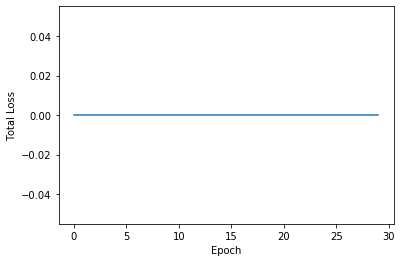

In [246]:
from matplotlib import pyplot as plt
%matplotlib inline
# NOT MY FUNCTION 
def perceptron_sgd_plot(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.
    
    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w)*Y[i]) <= 0:
                total_error += (np.dot(X[i], w)*Y[i])
                w = w + eta*X[i]*Y[i]
        errors.append(total_error*-1)
        
    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')
    
    return w

w = ptron(X,y)
w_cool = [float(i) for i in w]
print(f'''
length: {len(w_cool)}
nums  : \n{w_cool}
''')

print(perceptron_sgd_plot(X,y))

### Trying to understand teacher's function

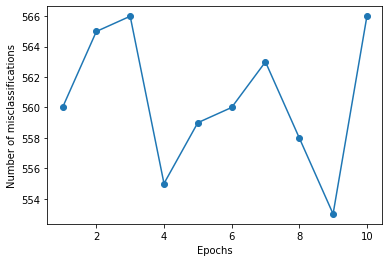

In [258]:
class Perceptron_teacher(object):
  def __init__(self, rate = 0.01, niter = 10):
    self.rate = rate
    self.niter = niter

  def fit(self, X, y):
    """Fit training data
    X : Training vectors, X.shape : [#samples, #features]
    y : Target values, y.shape : [#samples]
    """

    # weights
    self.weight = np.zeros(1 + X.shape[1])

    # Number of misclassifications
    self.errors = []  # Number of misclassifications

    for i in range(self.niter):
      err = 0
      for xi, target in zip(X, y):
        delta_w = self.rate * (target - self.predict(xi))
        self.weight[1:] += delta_w * xi
        self.weight[0] += delta_w
        err += int(delta_w != 0.0)
      self.errors.append(err)
    return self

  def net_input(self, X):
    """Calculate net input"""
    return np.dot(X, self.weight[1:]) + self.weight[0]

  def predict(self, X):
    """Return class label after unit step"""
    return np.where(self.net_input(X) >= 0.0, 1, -1)

pn = Perceptron_teacher(.01)
pn.fit(X, y)
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

This graph looks sooo good, like I maybe got something right but I doubt it cause the misclassification rate is legit most of the data.

### Hand-made stuff...that kinda isn't working out

In [248]:
d_norm

,0,1,2,3,4,5,6,7
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000
...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333


In [251]:
X.shape, y.shape

((768, 8), (768, 1))

In [175]:
##### Update this Class #####

class Perceptron(object):
    
    def __init__(self, niter = 10):
        # What's niter? The material?
        self.niter = niter
    
    def __sigmoid(self, x):
        """
        Does something...
        """
        return 1/(1+np.exp(-x))
        
    def __sigmoid_derivative(self, x):
        """
        Takes the sigmoid and times it by
        1 minus itself.
        """
        sx = sigmoid(x)
        return sx*(1-sx)
        
    def fit(self, X, y):
        """Fit training data
        X : Training vectors, X.shape : [#samples, #features]
        y : Target values, y.shape : [#samples]
        """
        # Unsure if I just copy-paste from JC's notebook...but idk that seems
        # like it isn't working either. 

    # Randomly Initialize Weights
    self.weight = 2 * np.random.random((8,1)) - 1

    for i in range(self.niter):
        # weighted sum of inputs / weights
        wgt_sum = np.dot(X, self.weight)
        # activate
        act_out = sigmoid(wgt_sum)
        # calc error
        err = y - act_out
        # adjust
        adj = err * sigmoid_d(act_out)
        # update the Weights
        self.weight += np.dot(X.T, adj)

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [176]:
pn = Perceptron()

In [252]:
pn.fit(X,y)

In [253]:
pn.predict(X)

ValueError: shapes (768,8) and (7,1) not aligned: 8 (dim 1) != 7 (dim 0)

## Stretch Goals:

- Research "backpropagation" to learn how weights get updated in neural networks (tomorrow's lecture). 
- Implement a multi-layer perceptron. (for non-linearly separable classes)
- Try and implement your own backpropagation algorithm.
- What are the pros and cons of the different activation functions? How should you decide between them for the different layers of a neural network?

### Backpropagation

A good [article](https://towardsdatascience.com/coding-neural-network-forward-propagation-and-backpropagtion-ccf8cf369f76) about coding it...but it's quite long and it's 5pm lmao.

Updating weights through gradient descent. Throwing the results back at all the weights in the hidden and input nodes, they change slightly and the NN runs again. Then each time it reruns you can make it do backpropagation again and again, correcting ever-so-slightly.

### Pros and Cons of activation functions
From [this](https://datascience.stackexchange.com/questions/14349/difference-of-activation-functions-in-neural-networks-in-general) stack overflow answer it seems like Sigmoid activation functions are a little out-of-use because of the fact that they kill gradients. So what that means is that if the local gradient is really small, when backpropagating, the sigmoid will just axe the gradient and nothing will get through the node. This makes the neurons oversaturated and then the NN won't learn nothin'.

Tanh seems to be generally preferred over sigmoid cause it's centered at zero (?) because it's just a scaled sigmoid neuron(?)!

ReLU is popular cause it seems to accelerate stochastic gradient descent(?) compared to the above two, and doesn't have expensive exponent based ops. ReLU can die though and will never rise above zero again, effectively killing itself if the learning rate is too too high.

Sigmoid seems to suck and people seem to want to only use ReLU non-linearity and sometimes Leaky ReLU or Maxout or whatever.

### Deciding between them for diff layers of NN

Not really sure. It seems like just no one uses Sigmoid or Tanh, just ReLU.